In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('Dataset Example.csv', dtype={'stop_name': 'str','daytime_routes': 'str','division':'str','line':'str','complex_id':'str'})

In [9]:
data

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
159528,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-21,9116.0,10446.0
159529,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-22,9225.0,10445.0
159530,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-23,9361.0,8109.0
159531,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-24,7652.0,6975.0


In [10]:
data.isnull()

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
159528,False,True,False,True,True,True,False,False,False,False,False,False
159529,False,True,False,True,True,True,False,False,False,False,False,False
159530,False,True,False,True,True,True,False,False,False,False,False,False
159531,False,True,False,True,True,True,False,False,False,False,False,False


In [11]:
data.isnull().sum()

stop_name          116
daytime_routes    6236
division           116
line              6236
borough           6236
structure         6236
gtfs_longitude     116
gtfs_latitude      116
complex_id           0
date                 0
entries             23
exits               23
dtype: int64

In [12]:
cd = data.dropna()

In [13]:
cd.stop_name=cd.stop_name.str.replace('-','').fillna(cd.stop_name)

In [14]:
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


In [15]:
cd.describe()

,gtfs_longitude,gtfs_latitude,entries,exits
count,153277.000000,153277.000000,153277.000000,153277.000000
mean,-73.933276,40.729674,4034.546494,3700.433111
std,0.057345,0.080119,8155.785614,7727.061295
min,-74.074835,40.576127,0.000000,0.000000
25%,-73.980305,40.674772,935.000000,808.000000
50%,-73.944890,40.718331,1923.000000,1759.000000
75%,-73.897174,40.791642,4051.000000,3682.000000
max,-73.755405,40.903125,197283.000000,186847.000000


# Detecting Outliers using Inter-Quartile Range (IQR)

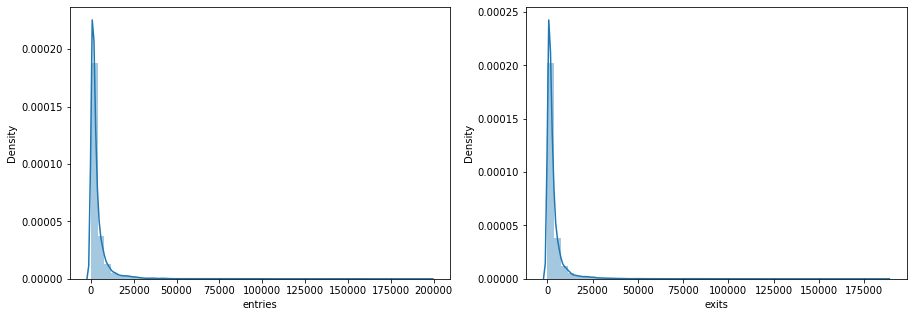

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(cd['entries'])
plt.subplot(1,2,2)
sns.distplot(cd['exits'])
plt.show()

<AxesSubplot:xlabel='exits'>

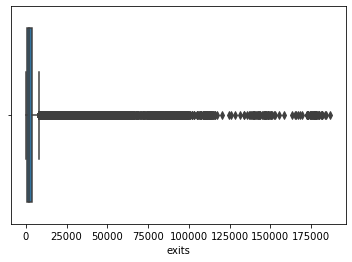

In [17]:
sns.boxplot(cd['exits'])

In [18]:
percentile_25 = cd['exits'].quantile(0.25)
percentile_75 = cd['exits'].quantile(0.75)

In [19]:
percentile_25

808.0

In [20]:
percentile_75

3682.0

In [21]:
iqr = percentile_75 - percentile_25
iqr

2874.0

In [22]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

In [23]:
upper_limit # upper whisker value

7993.0

In [24]:
lower_limit # Lower whisker value 

-3503.0

In [25]:
cd[cd['exits'] > upper_limit]
cd[cd['exits'] < lower_limit]

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits


In [26]:
new_cd = cd[cd['exits'] <= upper_limit]
new_cd.shape

(138738, 12)

In [27]:
new_cd # removing the outliers 

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
17,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-18,8368.0,7794.0
18,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-19,7082.0,7003.0
24,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-25,8269.0,7832.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


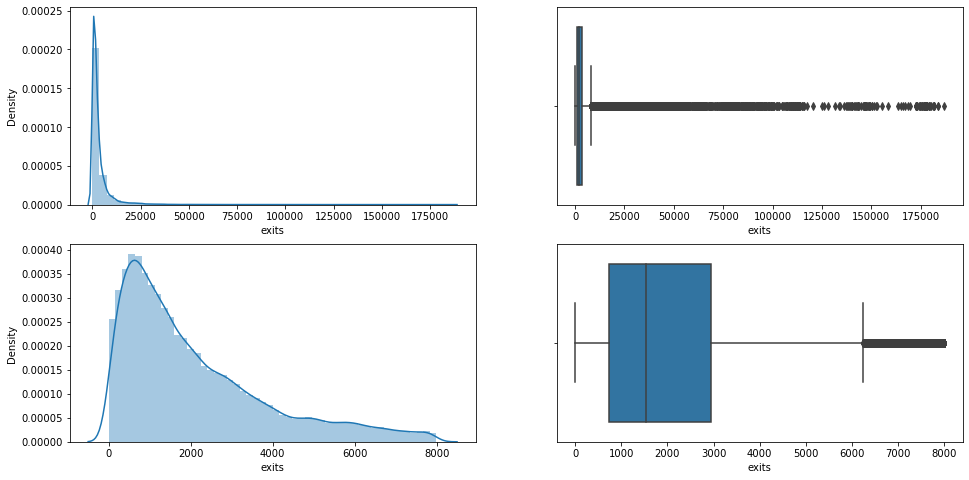

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(cd['exits'])
plt.subplot(2,2,2)
sns.boxplot(cd['exits'])
plt.subplot(2,2,3)
sns.distplot(new_cd['exits'])
plt.subplot(2,2,4)
sns.boxplot(new_cd['exits'])
plt.show()

In [34]:
# Capping(Winsorization) # Used since the data is not normally distribused
new_cd_cap = cd.copy()
new_cd_cap['exits'] = np.where(
    new_cd_cap['exits'] < lower_limit,
    lower_limit,
    np.where(
        new_cd_cap['exits'] > upper_limit,
        upper_limit,
        new_cd_cap['exits']
    )
)

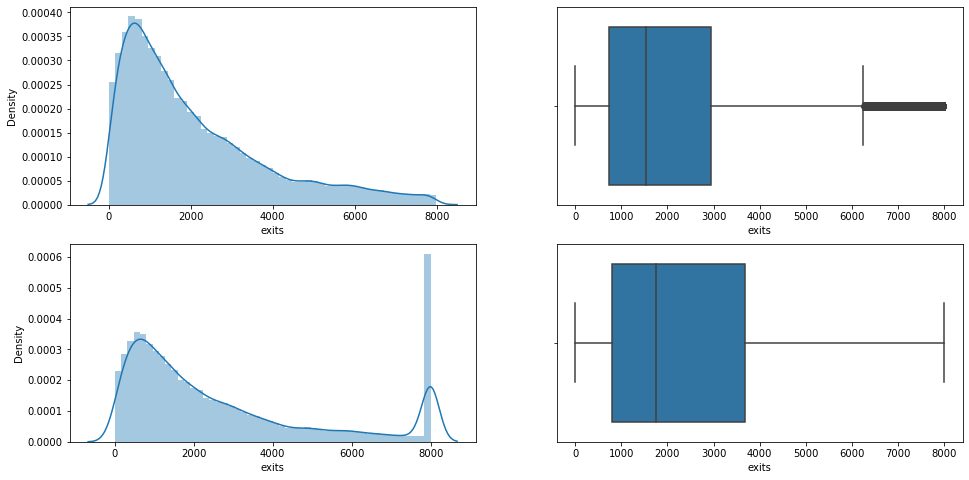

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_cd['exits'])
plt.subplot(2,2,2)
sns.boxplot(new_cd['exits'])
plt.subplot(2,2,3)
sns.distplot(new_cd_cap['exits'])
plt.subplot(2,2,4)
sns.boxplot(new_cd_cap['exits'])
plt.show()